In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

from anonymeter.evaluators import SinglingOutEvaluator
from anonymeter.evaluators import LinkabilityEvaluator
from anonymeter.evaluators import InferenceEvaluator

In [12]:
train = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_cor/high_cor1/train.csv")
control = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_cor/high_cor1/control.csv")

shigh_cor = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_cor/high_cor1/shigh_cor.csv")
shigh_cor09 = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_cor/high_cor1/shigh_cor09.csv")
synhigh_cor = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_cor/high_cor1/synhigh_cor.csv")

In [13]:
base_path = "C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_cor/high_cor1"

for i in range(100, 69, -1):  
    suffix = f"{i:03d}"  
    filename = f"shigh_cor{suffix}.csv"
    full_path = f"{base_path}/{filename}"
    
    try:
        globals()[f"shigh_cor{suffix}"] = pd.read_csv(full_path)
        print(f"Imported: shigh_cor{suffix}")
    except FileNotFoundError:
        print(f"File not found: {filename}")


Imported: shigh_cor100
Imported: shigh_cor099
Imported: shigh_cor098
Imported: shigh_cor097
Imported: shigh_cor096
Imported: shigh_cor095
Imported: shigh_cor094
Imported: shigh_cor093
Imported: shigh_cor092
Imported: shigh_cor091
Imported: shigh_cor090
Imported: shigh_cor089
Imported: shigh_cor088
Imported: shigh_cor087
Imported: shigh_cor086
Imported: shigh_cor085
Imported: shigh_cor084
Imported: shigh_cor083
Imported: shigh_cor082
Imported: shigh_cor081
Imported: shigh_cor080
Imported: shigh_cor079
Imported: shigh_cor078
Imported: shigh_cor077
Imported: shigh_cor076
Imported: shigh_cor075
Imported: shigh_cor074
Imported: shigh_cor073
Imported: shigh_cor072
Imported: shigh_cor071
Imported: shigh_cor070


## Singling Out Risk

## Synthesizer

In [4]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=2000)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.0, ci=(0.0, 0.0))
['income >= 2622751.56029416']
Successs rate of main attack: SuccessRate(value=0.0014575651169858408, error=0.001369297386280373)
Successs rate of baseline attack: SuccessRate(value=0.0009585236406264672, error=0.0009585236406264671)
Successs rate of control attack: SuccessRate(value=0.005334647819770936, error=0.0030448680878672114)


## Synthpop

In [5]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=2000)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.8332070519048408, ci=(0.814601485581474, 0.8518126182282075))
['zip_code == 15840', 'zip_code == 32903', 'zip_code == 89301']
Successs rate of main attack: SuccessRate(value=0.8628031533132646, error=0.01504804455700855)
Successs rate of baseline attack: SuccessRate(value=0.017925933836845168, error=0.00573525331500123)
Successs rate of control attack: SuccessRate(value=0.17744216255197237, error=0.016715929455066336)


# Singling Out Multivariate Risk

## Synthesizer

In [21]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.1100706455159179, ci=(0.030744928630686494, 0.18939636240114932))
["gender== 'Male' & job== 'Service' & income<= 6000.0", "marital_status== 'Single' & income<= 3100.0 & job== 'Service'", "education_level== 'Master\\'s' & income<= 5400.0 & job== 'Unemployed'"]
Successs rate of main attack: SuccessRate(value=0.37893016953630937, error=0.04234937599687385)
Successs rate of baseline attack: SuccessRate(value=0.013735926826160597, error=0.009457172929570103)
Successs rate of control attack: SuccessRate(value=0.3021133336772076, error=0.040065305738027614)


In [23]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.28266828522025805, ci=(0.23386780411027444, 0.3314687663302417))
["ethnicity== 'Asian' & education_level== 'Bachelor\\'s' & zip_code>= 99951.2355913054", "zip_code>= 99931.4110103836 & gender== 'Male' & marital_status== 'Married'", "education_level== 'PhD' & zip_code>= 99965.2302413778 & job== 'Executive'"]
Successs rate of main attack: SuccessRate(value=0.42162633650119696, error=0.03413538019580093)
Successs rate of baseline attack: SuccessRate(value=0.009853596531295446, error=0.0064118777583580715)
Successs rate of control attack: SuccessRate(value=0.19371519259204403, error=0.027281095032341378)


## Synthesizer rankcor = 0.9

In [25]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_cor09, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.06802822602528458, ci=(0.03902752349665616, 0.09702892855391299))
["education_level== 'Bachelor\\'s' & zip_code<= 10023.9795265687 & gender== 'Male'", "zip_code>= 99964.4213124188 & education_level== 'Bachelor\\'s' & ethnicity== 'Other'", "education_level== 'Some College' & zip_code<= 10109.0 & ethnicity== 'Black'"]
Successs rate of main attack: SuccessRate(value=0.09312597958923642, error=0.025183431700097014)
Successs rate of baseline attack: SuccessRate(value=0.011751175507083702, error=0.008635860327021462)
Successs rate of control attack: SuccessRate(value=0.026929735711752088, error=0.013663195556055363)


In [26]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_cor09, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.0819176229346629, ci=(0.05745409725204777, 0.10638114861727803))
["education_level== 'Some College' & zip_code>= 99930.6644796343 & job== 'Executive'", "age>= 86 & marital_status== 'Married' & income>= 954641.875889248", "age<= 20 & gender== 'Male' & zip_code<= 10113.6566772254"]
Successs rate of main attack: SuccessRate(value=0.10813168250598494, error=0.02138567964177825)
Successs rate of baseline attack: SuccessRate(value=0.007365543721809636, error=0.0054194747183681224)
Successs rate of control attack: SuccessRate(value=0.02855305822895288, error=0.011289601399877709)


## Synthpop

In [22]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.038567839203567066, ci=(0.0, 0.10801733704331293))
["ethnicity== 'Other' & job== 'Executive' & income<= 32100.0", "ethnicity== 'Other' & zip_code>= 90769 & income<= 8700.0", 'income>= 63700.0 & age<= 46 & zip_code<= 11634']
Successs rate of main attack: SuccessRate(value=0.26976884698708015, error=0.03871487355073208)
Successs rate of baseline attack: SuccessRate(value=0.019690180783391284, error=0.011560927750002972)
Successs rate of control attack: SuccessRate(value=0.2404756333426483, error=0.037264169864384876)


In [24]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.13459454271675103, ci=(0.08693929549244754, 0.1822497899410545))
["education_level== 'Master\\'s' & zip_code<= 15413 & income>= 176200.0", "income>= 138200.0 & age<= 27 & ethnicity== 'Asian'", 'income<= 11100.0 & zip_code<= 33237 & age>= 83']
Successs rate of main attack: SuccessRate(value=0.29224759040793485, error=0.03142399147760525)
Successs rate of baseline attack: SuccessRate(value=0.023537886983467402, error=0.010228762629619952)
Successs rate of control attack: SuccessRate(value=0.18217246767324655, error=0.026639557347915392)


# Linkability

In [30]:
aux_cols = [["age","zip_code","gender","education_level"],
            ["ethnicity","marital_status","job","income"]]

## synthesizer rankcor = 1

### n_neighbors = 1

In [31]:
levaluator11 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator11.evaluate(n_jobs=-2) 
print(levaluator11.risk())
res = levaluator11.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.1084750309621762, ci=(0.09879808132657086, 0.11815198059778154))
Successs rate of main attack: SuccessRate(value=0.1091253821870957, error=0.009650567522719334)
Successs rate of baseline attack: SuccessRate(value=0.0007294817840283179, error=0.0006853492820706416)
Successs rate of control attack: SuccessRate(value=0.0007294817840283179, error=0.0006853492820706416)


### n_neighbors = 10

In [15]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.7323251955905495, ci=(0.7181285326311724, 0.7465218585499267))
Successs rate of main attack: SuccessRate(value=0.7430166154197801, error=0.01353308876972174)
Successs rate of baseline attack: SuccessRate(value=0.0029773230366264896, error=0.001618780091608312)
Successs rate of control attack: SuccessRate(value=0.03994182363490753, error=0.006049483174190575)


### n_neighbors = 20

In [32]:
levaluator12 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator12.evaluate(n_jobs=-2) 
print(levaluator12.risk())
res = levaluator12.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.9254420662618347, ci=(0.9165871846309029, 0.9342969478927664))
Successs rate of main attack: SuccessRate(value=0.9358314428648677, error=0.007578948627566191)
Successs rate of baseline attack: SuccessRate(value=0.011469167768664027, error=0.0032646442292868076)
Successs rate of control attack: SuccessRate(value=0.13934635902758222, error=0.010721248903190893)


## synthpop

### n_neighbors = 1

In [33]:
levaluator21 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator21.evaluate(n_jobs=-2) 
print(levaluator21.risk())
res = levaluator21.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.00900017836236144, ci=(0.005843352868095528, 0.012157003856627352))
Successs rate of main attack: SuccessRate(value=0.009970606933598579, error=0.0030413142522961387)
Successs rate of baseline attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)
Successs rate of control attack: SuccessRate(value=0.0009792419232058924, error=0.000842113178252425)


### n_neighbors = 10

In [35]:
levaluator2 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator2.evaluate(n_jobs=-2) 
print(levaluator2.risk())
res = levaluator2.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.12693758060290597, ci=(0.11437450325107901, 0.13950065795473293))
Successs rate of main attack: SuccessRate(value=0.15483148765659185, error=0.011200076836314809)
Successs rate of baseline attack: SuccessRate(value=0.004725644010869512, error=0.002070396402114127)
Successs rate of control attack: SuccessRate(value=0.031949499181225145, error=0.005428858584943303)


### n_neighbors = 20

In [36]:
levaluator22 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator22.evaluate(n_jobs=-2) 
print(levaluator22.risk())
res = levaluator22.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.16577609182958195, ci=(0.14776418755186102, 0.18378799610730287))
Successs rate of main attack: SuccessRate(value=0.26222834750294893, error=0.013622270710334004)
Successs rate of baseline attack: SuccessRate(value=0.013717009021262199, error=0.003572433169694957)
Successs rate of control attack: SuccessRate(value=0.11561914580571264, error=0.009897890800736586)


## synthesizer rankcor = [0.70,0.99]

In [17]:
linkability_results = []
suffixes = [f"{i:03d}" for i in range(100, 69, -1)]

for suffix in suffixes:  
    syn_varname = f"shigh_cor{suffix}"
    
    if syn_varname in globals():
        syn_data = globals()[syn_varname]
        
        print(f"Evaluating dataset: {syn_varname}")
        
        levaluator = LinkabilityEvaluator(
            ori=train,
            syn=syn_data,
            control=control,
            n_attacks=4000,
            aux_cols=aux_cols,
            n_neighbors=10
        )
        
        levaluator.evaluate(n_jobs=-2)
        
        res = levaluator.results()

        privacy_risk = levaluator.risk()
        print(f"Privacy risk for {syn_varname}: {privacy_risk}")
        
        linkability_results.append({
            "rankcor": int(suffix) / 100,  
            "attack_rate": res.attack_rate.value,  
            "baseline_rate": res.baseline_rate.value, 
            "control_rate": res.control_rate.value,   
            "risk": privacy_risk  
        })

df_link = pd.DataFrame(linkability_results)

df_link = df_link.sort_values(by="rankcor", ascending=False)

Evaluating dataset: shigh_cor100
Privacy risk for shigh_cor100: PrivacyRisk(value=0.879265473050839, ci=(0.8688858164052065, 0.8896451296964716))
Evaluating dataset: shigh_cor099
Privacy risk for shigh_cor099: PrivacyRisk(value=0.5886015856568347, ci=(0.5725095951383228, 0.6046935761753467))
Evaluating dataset: shigh_cor098
Privacy risk for shigh_cor098: PrivacyRisk(value=0.5079387222776247, ci=(0.49155330058675795, 0.5243241439684915))
Evaluating dataset: shigh_cor097
Privacy risk for shigh_cor097: PrivacyRisk(value=0.5688832933110517, ci=(0.5528168794869882, 0.5849497071351152))
Evaluating dataset: shigh_cor096
Privacy risk for shigh_cor096: PrivacyRisk(value=0.5618792582360866, ci=(0.545770458523075, 0.5779880579490982))
Evaluating dataset: shigh_cor095
Privacy risk for shigh_cor095: PrivacyRisk(value=0.5610997121932854, ci=(0.5451932193885326, 0.5770062049980381))
Evaluating dataset: shigh_cor094
Privacy risk for shigh_cor094: PrivacyRisk(value=0.5065842117115678, ci=(0.49038128462

In [18]:
df_link['risk_value'] = df_link['risk'].apply(lambda x: x.value)
df_link['risk_ci_lower'] = df_link['risk'].apply(lambda x: x.ci[0])
df_link['risk_ci_upper'] = df_link['risk'].apply(lambda x: x.ci[1])

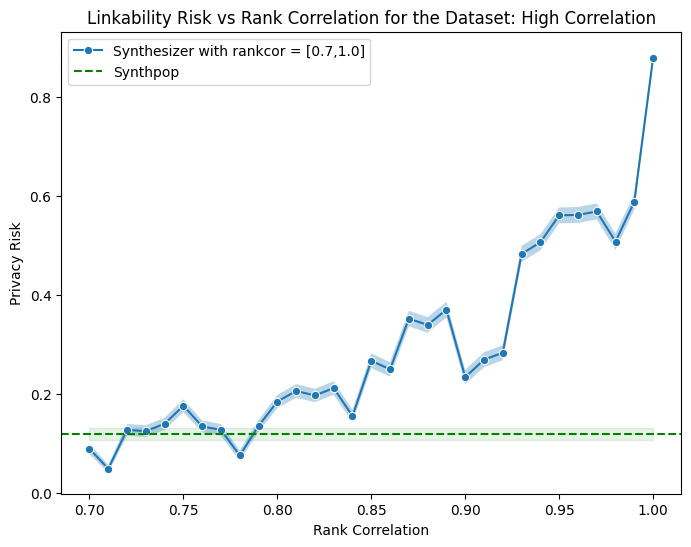

In [19]:
risk1 = levaluator2.risk()

row1 = {
    'rankcor': 1.00,  
    'risk_value': risk1.value,
    'risk_ci_lower': risk1.ci[0],
    'risk_ci_upper': risk1.ci[1]
}


plt.figure(figsize=(8, 6))
sns.lineplot(
    x='rankcor',
    y='risk_value',
    data=df_link,
    marker='o',
    label='Synthesizer with rankcor = [0.7,1.0]'
)

plt.fill_between(
    df_link['rankcor'],
    df_link['risk_ci_lower'],
    df_link['risk_ci_upper'],
    alpha=0.3
)

plt.axhline(y=risk1.value, color='green', linestyle='--', label='Synthpop')
plt.fill_between(
    df_link['rankcor'],
    risk1.ci[0],
    risk1.ci[1],
    color='green',
    alpha=0.1
)

plt.xlabel('Rank Correlation')
plt.ylabel('Privacy Risk')
plt.title('Linkability Risk vs Rank Correlation for the Dataset: High Correlation')
plt.legend()
plt.show()



# Inference

## synthesizer rankcor = 1

In [21]:
columns = train.columns
results1 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator1 = InferenceEvaluator(ori=train, 
                                   syn=shigh_cor, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=2000)
    ievaluator1.evaluate(n_jobs=-2)
    results1.append((secret, ievaluator1.results()))

print(ievaluator1.risk())

PrivacyRisk(value=0.9480132358880548, ci=(0.9375843904897644, 0.9584420812863451))


## synthpop

In [22]:
columns = train.columns
results3 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator3 = InferenceEvaluator(ori=train, 
                                   syn=synhigh_cor, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=1000)
    ievaluator3.evaluate(n_jobs=-2)
    results3.append((secret, ievaluator3.results()))

print(ievaluator3.risk())

PrivacyRisk(value=0.11400568543781993, ci=(0.07887734807106705, 0.1491340228045728))


## synthesizer rankcor = [0.70,0.99]

In [23]:
columns = train.columns

for i in range(100, 69, -1):  
    suffix = f"{i:03d}"  
    
    syn_data_varname = f"shigh_cor{suffix}"
    results_varname = f"results{suffix}"
    
    if syn_data_varname in globals():
        syn_data = globals()[syn_data_varname]
        results_list = []

        print(f"\nRunning inference attacks on: {syn_data_varname}")
        
        for secret in columns:
            aux_cols = [col for col in columns if col != secret]
            
            ievaluator = InferenceEvaluator(
                ori=train,
                syn=syn_data,
                control=control,
                aux_cols=aux_cols,
                secret=secret,
                n_attacks=2000
            )
            ievaluator.evaluate(n_jobs=-2)
            results_list.append((secret, ievaluator.results()))
        
        globals()[results_varname] = results_list

        print(f"Risk for {syn_data_varname}: {ievaluator.risk()}")
    else:
        print(f"{syn_data_varname} not found in globals.")



Running inference attacks on: shigh_cor100
Risk for shigh_cor100: PrivacyRisk(value=0.9526994925234034, ci=(0.9426866017248209, 0.9627123833219858))

Running inference attacks on: shigh_cor099
Risk for shigh_cor099: PrivacyRisk(value=0.8574249821499536, ci=(0.8407830904403715, 0.8740668738595356))

Running inference attacks on: shigh_cor098
Risk for shigh_cor098: PrivacyRisk(value=0.7858709894938972, ci=(0.7661333796550678, 0.8056085993327267))

Running inference attacks on: shigh_cor097
Risk for shigh_cor097: PrivacyRisk(value=0.7543100311293893, ci=(0.7333707976266477, 0.775249264632131))

Running inference attacks on: shigh_cor096
Risk for shigh_cor096: PrivacyRisk(value=0.6894120670647759, ci=(0.6666563905888593, 0.7121677435406925))

Running inference attacks on: shigh_cor095
Risk for shigh_cor095: PrivacyRisk(value=0.6005918696449987, ci=(0.5760711482224226, 0.6251125910675748))

Running inference attacks on: shigh_cor094
Risk for shigh_cor094: PrivacyRisk(value=0.57978614064564

C:\Users\maria\AppData\Local\Temp\ipykernel_23796\1847657102.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23796\1847657102.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23796\1847657102.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23796\1847657102.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='righ

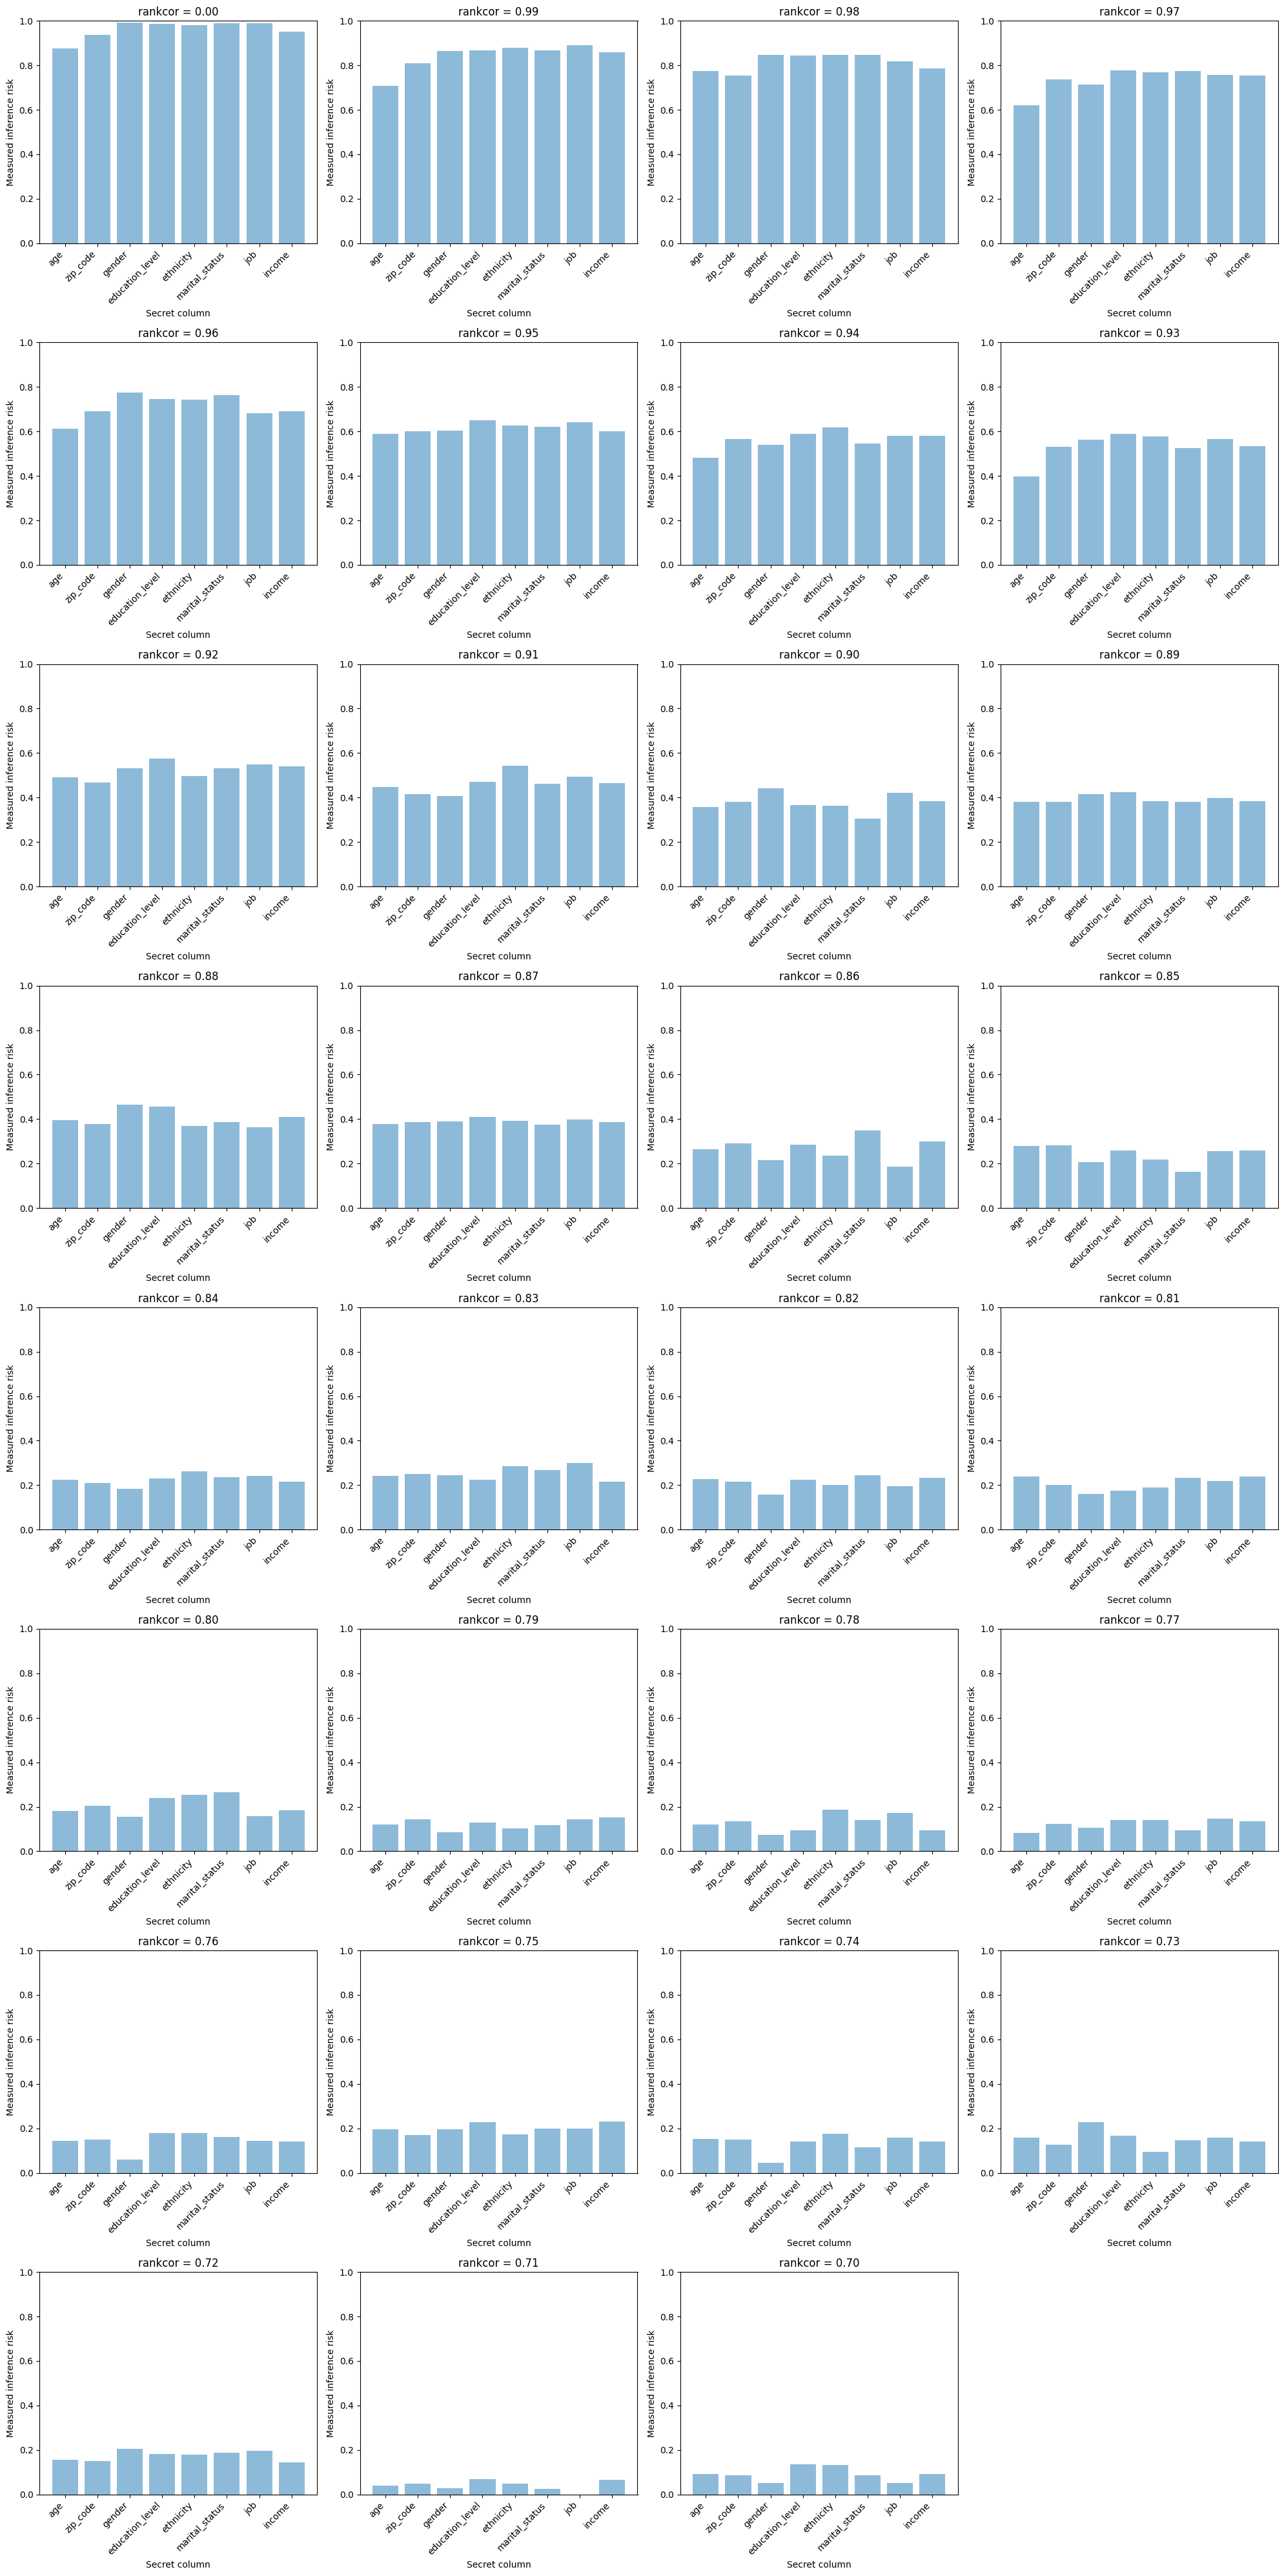

In [27]:
suffixes = [f"{i:03d}" for i in range(100, 69, -1)]
num_plots = len(suffixes)

cols = 4
rows = math.ceil(num_plots / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  

for idx, suffix in enumerate(suffixes):
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        risks = [res[1].risk().value for res in results]
        secrets = [res[0] for res in results]

        ax = axes[idx]
        ax.bar(x=secrets, height=risks, alpha=0.5, ecolor='black', capsize=10)
        ax.set_xticklabels(secrets, rotation=45, ha='right')
        ax.set_ylabel("Measured inference risk")
        ax.set_xlabel("Secret column")
        ax.set_ylim(0, 1)
        ax.set_title(f"rankcor = 0.{suffix[-2:]}")
    else:
        axes[idx].axis("off") 
        
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


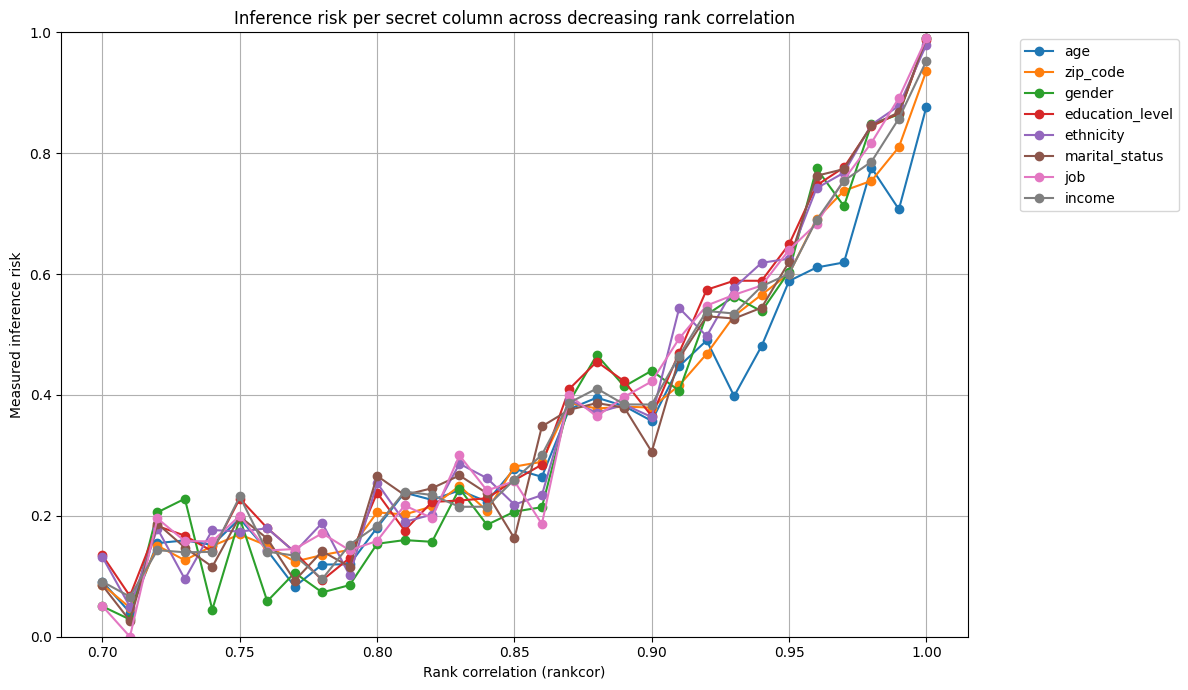

In [28]:
suffixes = [f"{i:03d}" for i in range(100, 69, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]

secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)  

plt.figure(figsize=(12, 7))

for secret, risks in risk_by_secret.items():
    plt.plot(rankcors, risks, marker='o', label=secret)

plt.xlabel("Rank correlation (rankcor)")
plt.ylabel("Measured inference risk")
plt.title("Inference risk per secret column across decreasing rank correlation")
plt.xticks(rankcors[::5])
plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


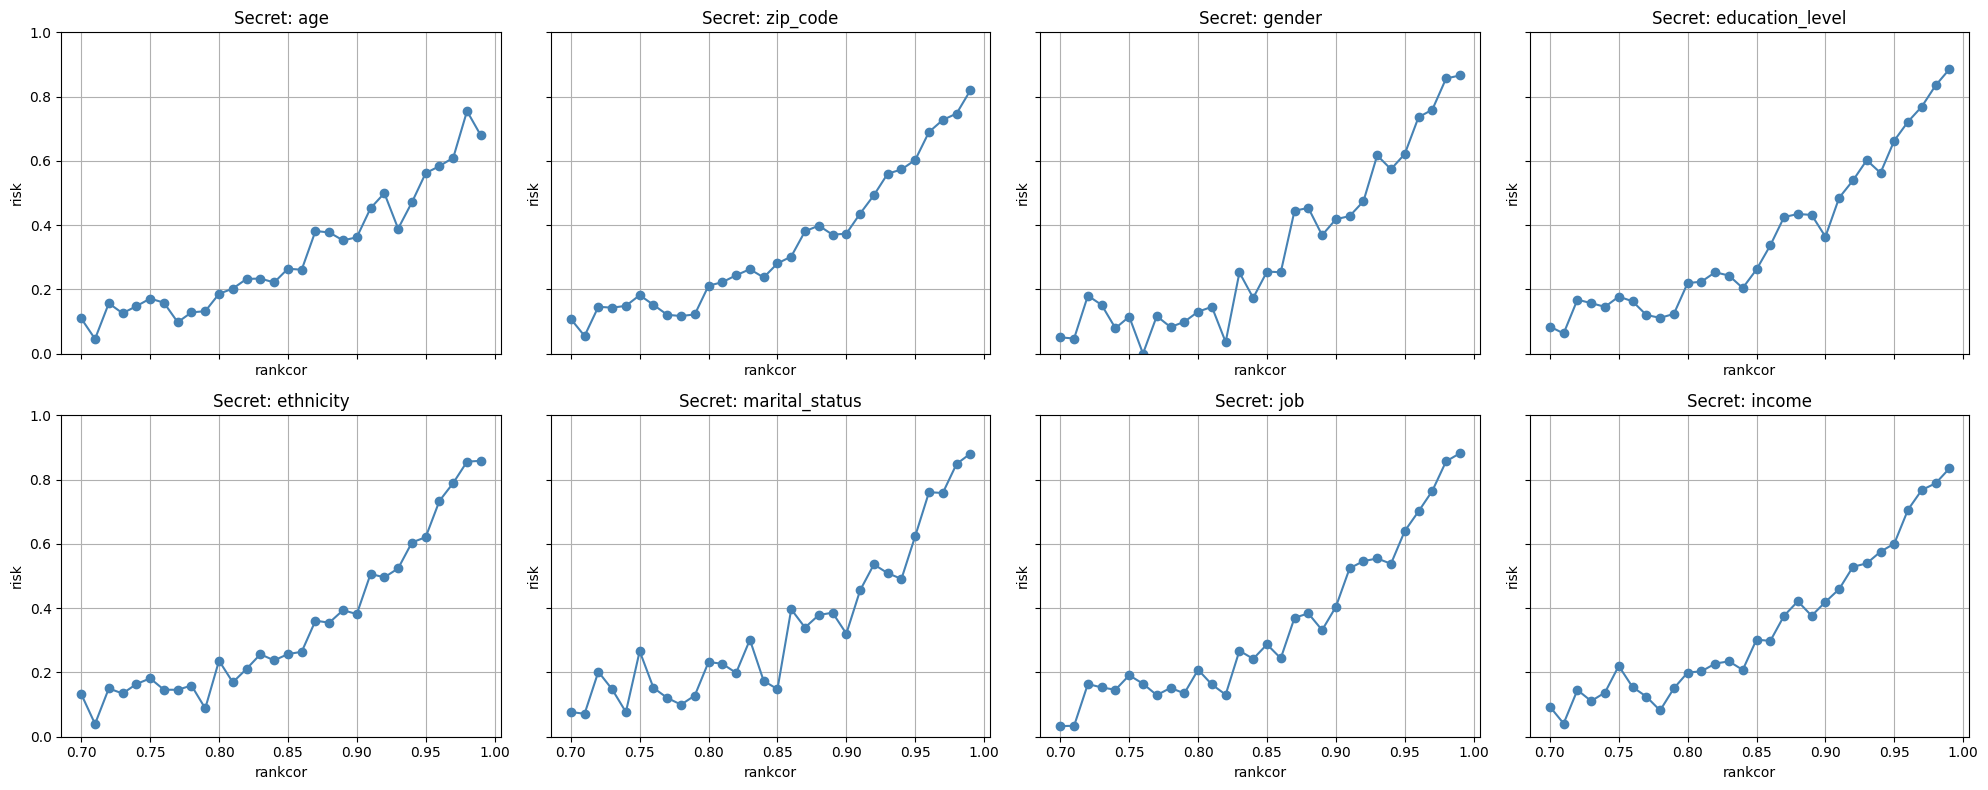

In [54]:
suffixes = [f"{i:03d}" for i in range(99, 69, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]
secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue')
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("rankcor")
    ax.set_ylabel("risk")
    ax.grid(True)

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


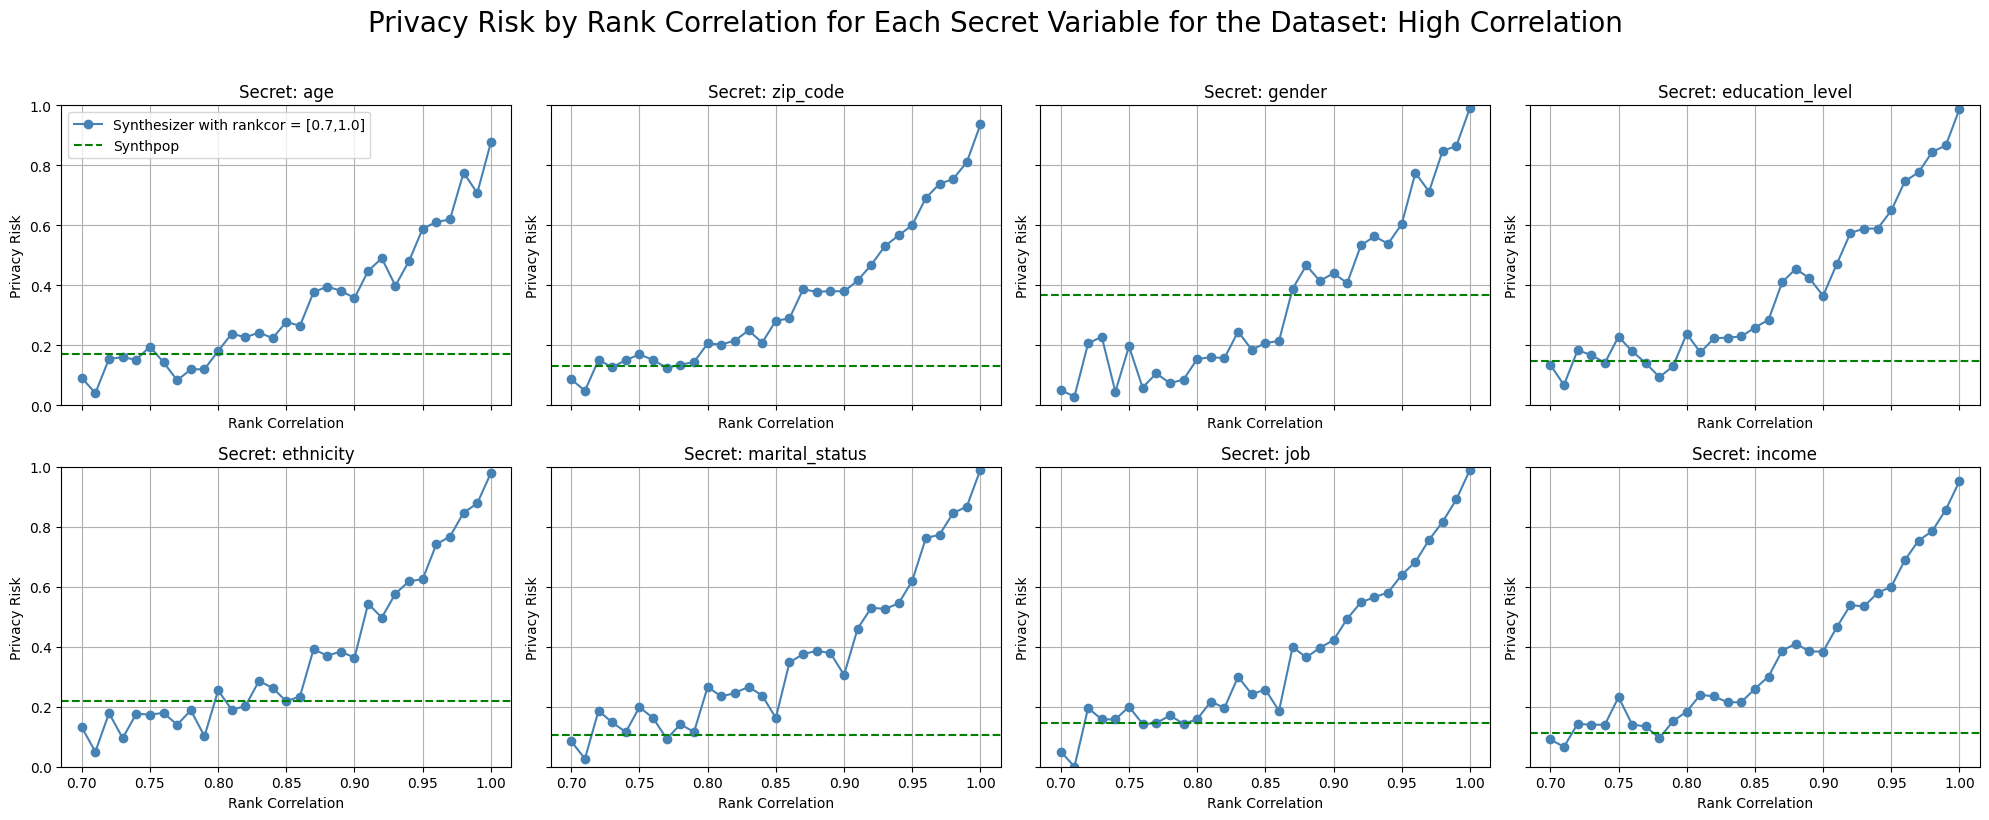

In [29]:
rankcors = [int(suffix) / 100 for suffix in suffixes]

risk1_dict = {secret: result.risk().value for secret, result in results3}

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue', label='Synthesizer with rankcor = [0.7,1.0]')

    if secret in risk1_dict:
        ax.axhline(y=risk1_dict[secret], color='green', linestyle='--', label='Synthpop')
    
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("Rank Correlation")
    ax.set_ylabel("Privacy Risk")
    ax.grid(True)

    if idx == 0:
        ax.legend()

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Privacy Risk by Rank Correlation for Each Secret Variable for the Dataset: High Correlation", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

